In [69]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
# Read mavel movie file
marvel=pd.read_csv("C:/Users/chandranshu/Desktop/marvel.csv",index_col='page_id')

In [71]:
marvel.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
page_id,,,,,,,,,,,,
1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [72]:
marvel.isna().sum()

name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [73]:
len(marvel)

16376

In [74]:
# as there are good amount of missing values(NaN) , so we drop columns with NAN more than 30%

In [75]:
drop_columns=[i for i in marvel.columns.values if(marvel[i].isna().sum())>5000]

In [76]:
drop_columns

['EYE', 'GSM']

In [77]:
#modified data
marvel2=marvel.drop(drop_columns,axis=1)

In [78]:
marvel2.isna().sum()

name                   0
urlslug                0
ID                  3770
ALIGN               2812
HAIR                4264
SEX                  854
ALIVE                  3
APPEARANCES         1096
FIRST APPEARANCE     815
Year                 815
dtype: int64

In [79]:
#urlslug is no use , so we drop it
marvel2=marvel2.drop('urlslug',axis=1)

In [80]:
marvel2.head()

,name,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
page_id,,,,,,,,,
1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
7139,Captain America (Steven Rogers),Public Identity,Good Characters,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [81]:
#label encoding

In [82]:
obj_columnmarvel=[i for i in marvel2.columns.values if marvel2[i].dtype!='O']

In [83]:
#data table with object type data
obj_marvel=marvel2.drop(obj_columnmarvel,axis=1)

In [84]:
#creating a copy of marvel2
marvel_copy=marvel2.copy()

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_marvel.columns.values:
    marvel_copy[i]=le.fit_transform(marvel_copy[i])
    print(i,le.classes_)

name ["'Spinner (Earth-616)" '107 (Earth-616)' '11-Ball (Earth-616)' ...
 '\\"Spider-Girl\\" (Mutant\\/Spider Clone) (Earth-616)'
 '\\"Thumper\\" Morgan (Earth-616)' '\\u00c4kr\\u00e4s (Earth-616)']
ID ['Known to Authorities Identity' 'No Dual Identity' 'Public Identity'
 'Secret Identity' nan]
ALIGN ['Bad Characters' 'Good Characters' 'Neutral Characters' nan]
HAIR ['Auburn Hair' 'Bald' 'Black Hair' 'Blond Hair' 'Blue Hair' 'Bronze Hair'
 'Brown Hair' 'Dyed Hair' 'Gold Hair' 'Green Hair' 'Grey Hair'
 'Light Brown Hair' 'Magenta Hair' 'No Hair' 'Orange Hair'
 'Orange-brown Hair' 'Pink Hair' 'Purple Hair' 'Red Hair'
 'Reddish Blond Hair' 'Silver Hair' 'Strawberry Blond Hair'
 'Variable Hair' 'White Hair' 'Yellow Hair' nan]
SEX ['Agender Characters' 'Female Characters' 'Genderfluid Characters'
 'Male Characters' nan]
ALIVE ['Deceased Characters' 'Living Characters' nan]
FIRST APPEARANCE ['Apr-00' 'Apr-01' 'Apr-02' 'Apr-03' 'Apr-04' 'Apr-05' 'Apr-06' 'Apr-07'
 'Apr-08' 'Apr-09' 'Apr-10' '

In [56]:
marvel_copy.head()

,name,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
page_id,,,,,,,,,
1678,13954,3,1,6,3,1,357,99,23
7139,2327,2,1,23,3,1,356,503,2
64786,15996,2,2,2,3,1,355,738,35
1868,6771,2,1,2,3,1,354,521,24
2460,14709,1,1,3,3,1,353,649,11


In [59]:
# so we will use 2 data sets : marvel2 and marvel_copy for explore and visualisation

<AxesSubplot:>

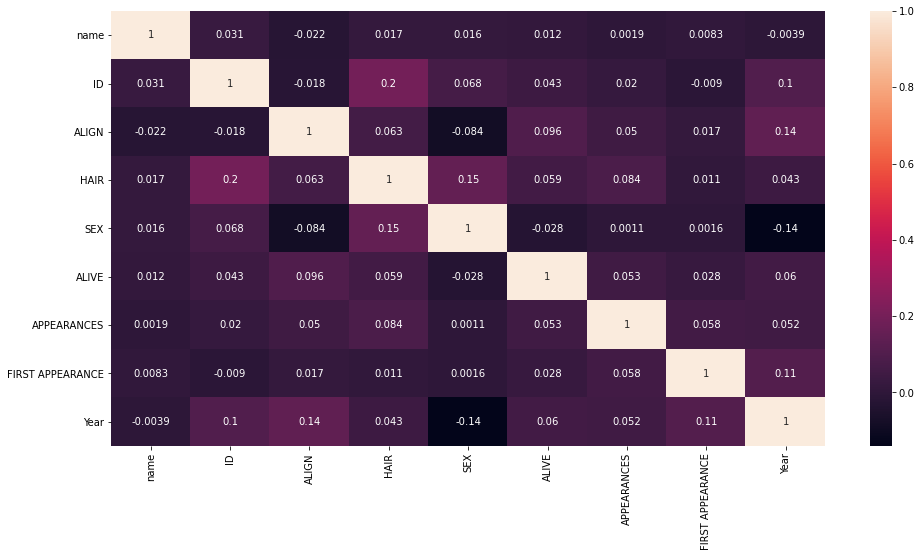

In [65]:
plt.figure(figsize=(16,8))
sns.heatmap(marvel_copy.corr(),annot=True)

'''
There is no strong linear relation between any of the attributes as the maximum correlation is 0.2,
so we can say that no relation between the variables
'''

In [66]:
#now we look at how the characteristics like hair ,sex,align of characters have changed over years and appearances

<AxesSubplot:xlabel='SEX'>

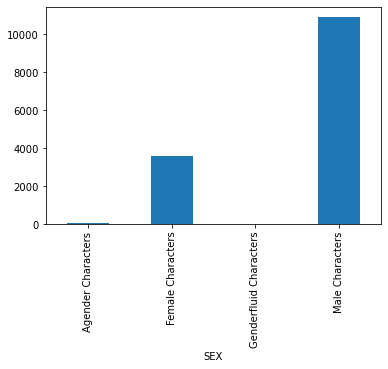

In [92]:
marvel2.groupby('SEX').APPEARANCES.count().plot.bar()

<AxesSubplot:xlabel='SEX', ylabel='Year'>

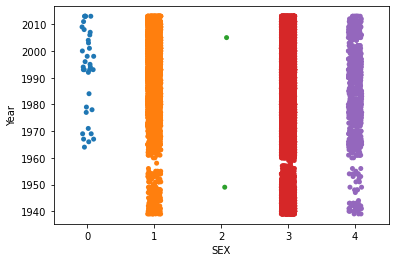

In [93]:
sns.stripplot(x=marvel_copy['SEX'],y=marvel_copy['Year'])

'''
SEX :
Agender Characters' -0
'Female Characters' -1
'Genderfluid Characters'-2
'Male Characters '-3
nan -4
'''


In [94]:
#Thus we see that though males have had more appearances as years male characters have been consistant but females have become consistant in recent years

<AxesSubplot:xlabel='HAIR'>

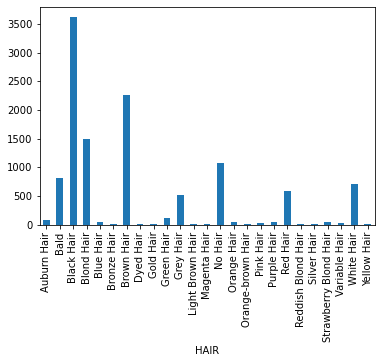

In [95]:
marvel2.groupby('HAIR').APPEARANCES.count().plot.bar()

<AxesSubplot:xlabel='HAIR,ALIGN'>

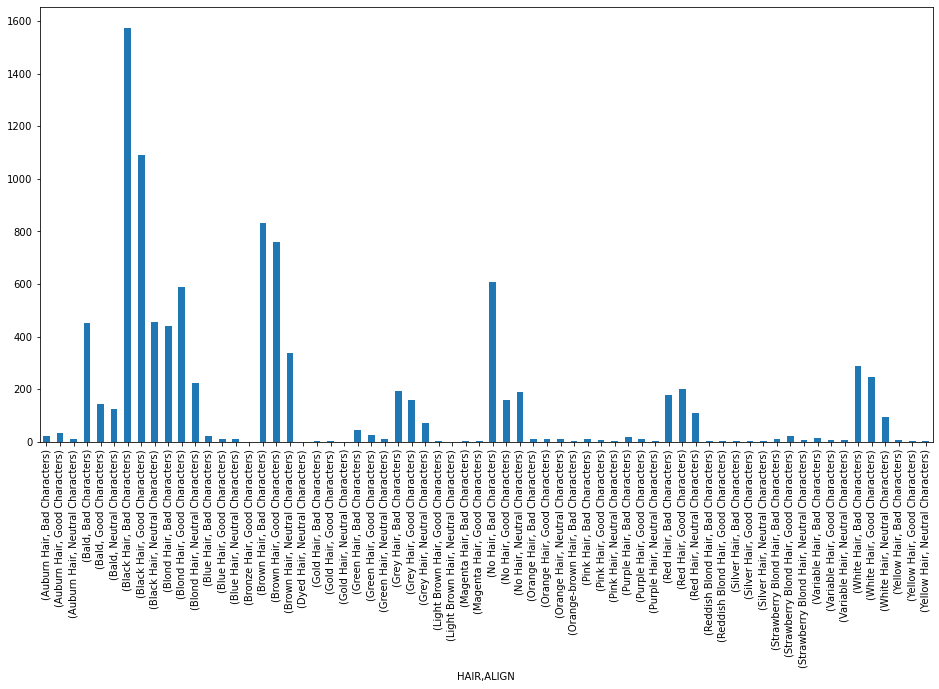

In [219]:
plt.figure(figsize=(16,8))
marvel2.groupby(['HAIR','ALIGN']).APPEARANCES.count().plot.bar()

<AxesSubplot:xlabel='ALIGN'>

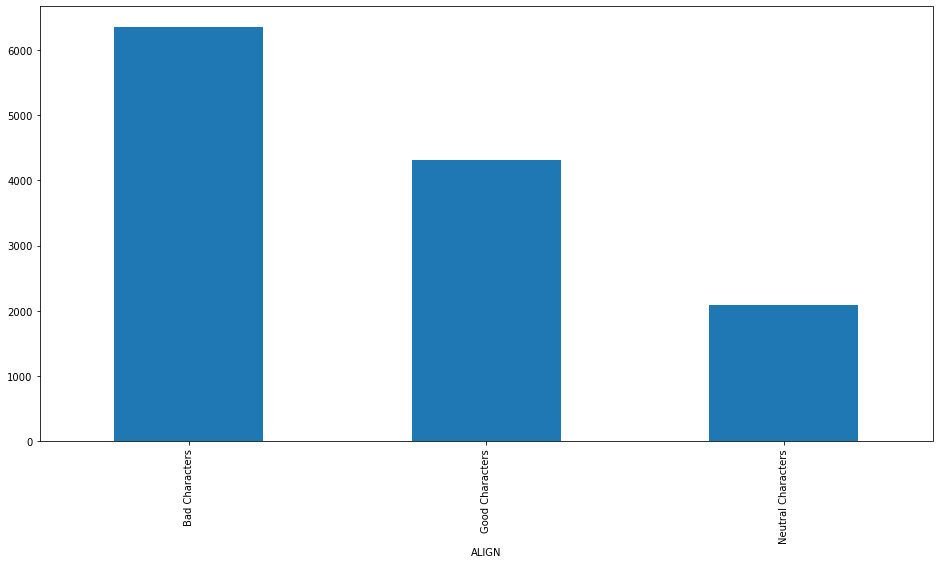

In [100]:
plt.figure(figsize=(16,8))
marvel2.groupby('ALIGN').APPEARANCES.count().plot.bar()

In [101]:
#So we see that the comics feature mostly the bad chatracters and there is some experiment with hair styles of bad ones
#while good characters have mostly black or brown characters

<AxesSubplot:xlabel='ID'>

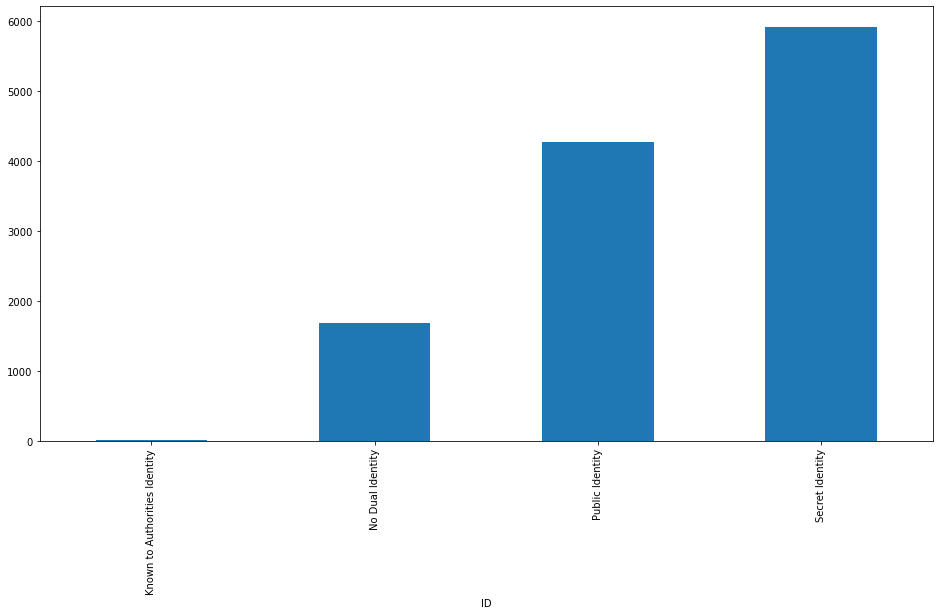

In [215]:
plt.figure(figsize=(16,8))
marvel2.groupby(['ID']).APPEARANCES.count().plot.bar()

<AxesSubplot:xlabel='ID,ALIGN'>

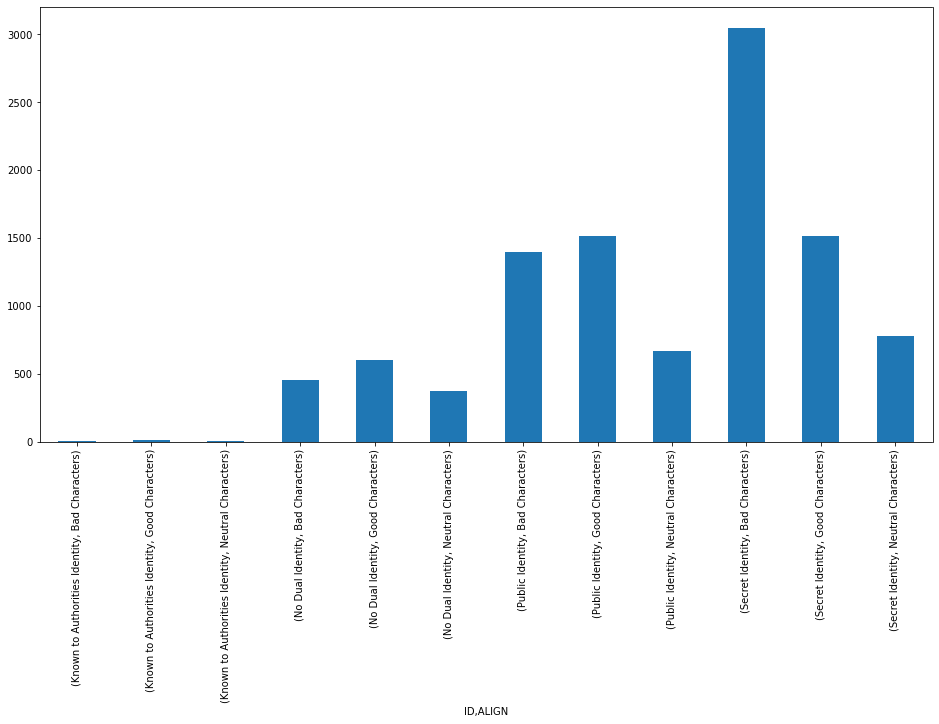

In [107]:
plt.figure(figsize=(16,8))
marvel2.groupby(['ID','ALIGN']).APPEARANCES.count().plot.bar()

In [108]:
#Most common of the characters play the secret identity roles and are bad characters
#A public identity character can be good or bad

<AxesSubplot:xlabel='Year', ylabel='APPEARANCES'>

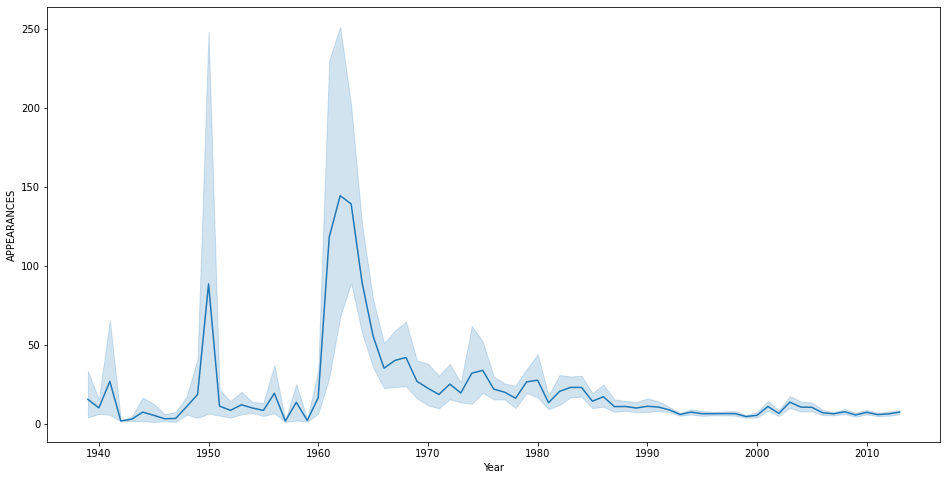

In [114]:
subset_timeseriesofappear=marvel2.loc[:,['APPEARANCES','Year']]
plt.figure(figsize=(16,8))
sns.lineplot(y=subset_timeseriesofappear.loc[:,'APPEARANCES'],x=subset_timeseriesofappear.loc[:,'Year'])

In [209]:
#we see about new appearances

<AxesSubplot:xlabel='Year', ylabel='FIRST APPEARANCE'>

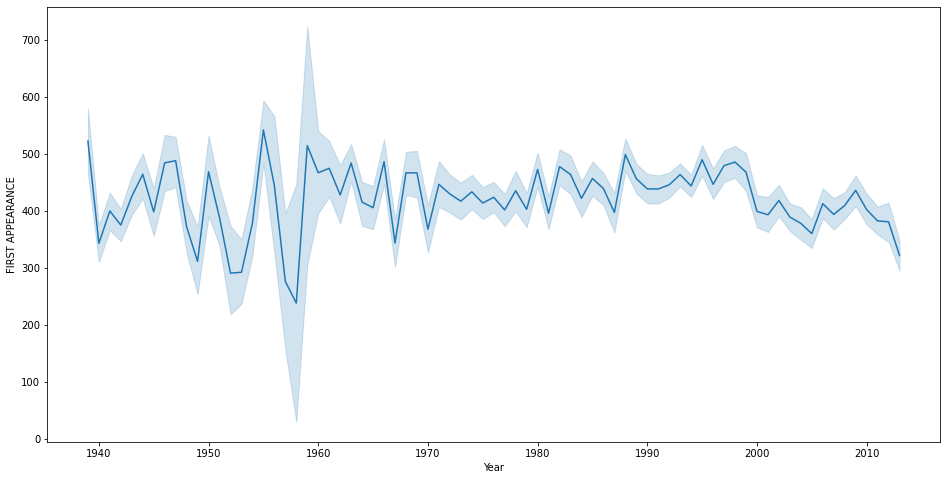

In [210]:
subset_timeseriesofappear=marvel_copy.loc[:,['FIRST APPEARANCE','Year']]
plt.figure(figsize=(16,8))
sns.lineplot(y=subset_timeseriesofappear.loc[:,'FIRST APPEARANCE'],x=subset_timeseriesofappear.loc[:,'Year'])

In [208]:
#thus we see that though there have been a regular introduction of the characters, but of late there has been a slow fall

<AxesSubplot:xlabel='Year', ylabel='ID'>

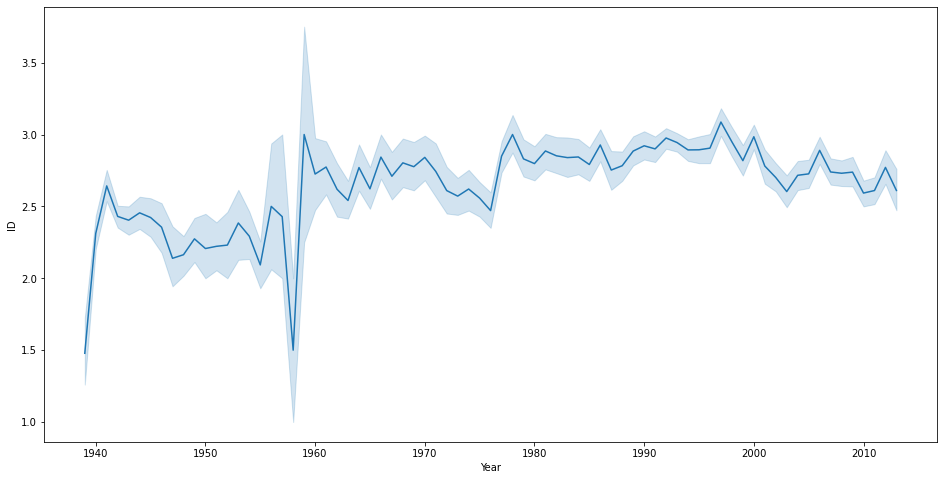

In [213]:
subset_timeseriesofappear=marvel_copy.loc[:,['Year','ID']]
plt.figure(figsize=(16,8))
sns.lineplot(x=subset_timeseriesofappear.loc[:,'Year'],y=subset_timeseriesofappear.loc[:,'ID'])

In [216]:
#in early 90's , public identity characters were common,but since 1980's the secret identity characters become common